In [1]:
import pandas as pd

# Load datasets
airline_data = pd.read_csv('after cleaning data/Indian_Airline_data.csv')
business_data = pd.read_csv('after cleaning data/Business_data.csv')
economy_data = pd.read_csv('after cleaning data/Economy_data.csv')

# Preview the first 5 rows of each dataset
print("Indian_Airline_data.csv:")
display(airline_data.head())

print("Business_data.csv:")
display(business_data.head())

print("Economy_data.csv:")
display(economy_data.head())

# Display column names for each dataset
print("Airline Columns:", airline_data.columns.tolist())
print("Business Columns:", business_data.columns.tolist())
print("Economy Columns:", economy_data.columns.tolist())


Indian_Airline_data.csv:


,airline,flight,source_city,departure_time,arrival_time,destination_city,class,duration,days_left,price,total_stop,Duration_in_Minutes
0,SpiceJet,SG-8709,Delhi,Evening,Night,Mumbai,Economy,2.17,1,5953,0,130
1,SpiceJet,SG-8157,Delhi,Early_Morning,Morning,Mumbai,Economy,2.33,1,5953,0,140
2,AirAsia,I5-764,Delhi,Early_Morning,Early_Morning,Mumbai,Economy,2.17,1,5956,0,130
3,Vistara,UK-995,Delhi,Morning,Afternoon,Mumbai,Economy,2.25,1,5955,0,135
4,Vistara,UK-963,Delhi,Morning,Morning,Mumbai,Economy,2.33,1,5955,0,140


Business_data.csv:


,date,airline,ch_code,num_code,dep_time,from,time_taken,arr_time,to,price,TravelDay,TravelMonth,dep_time_hrs,dep_time_min,Arr_time_hrs,Arr_time_min,TravleTime_Min,total_stop
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,20:00,Mumbai,"25,612",11,2,18,0,20,0,120,0
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,21:15,Mumbai,"25,612",11,2,19,0,21,15,135,0
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,20:45,Mumbai,"42,220",11,2,20,0,20,45,1485,1
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,23:55,Mumbai,"44,450",11,2,21,25,23,55,1590,1
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,23:55,Mumbai,"46,690",11,2,17,15,23,55,400,1


Economy_data.csv:


,date,airline,ch_code,num_code,dep_time,from,time_taken,arr_time,to,price,TravelDay,TravelMonth,dep_time_hrs,dep_time_min,Arr_time_hrs,Arr_time_min,TravleTime_Min,total_stop
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,21:05,Mumbai,"5,953",11,2,18,55,21,5,130,0
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,08:40,Mumbai,"5,953",11,2,6,20,8,40,140,0
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,06:35,Mumbai,"5,956",11,2,4,25,6,35,130,0
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,12:35,Mumbai,"5,955",11,2,10,20,12,35,135,0
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,11:10,Mumbai,"5,955",11,2,8,50,11,10,140,0


Airline Columns: ['airline', 'flight', 'source_city', 'departure_time', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price', 'total_stop', 'Duration_in_Minutes']
Business Columns: ['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from', 'time_taken', 'arr_time', 'to', 'price', 'TravelDay', 'TravelMonth', 'dep_time_hrs', 'dep_time_min', 'Arr_time_hrs', 'Arr_time_min', 'TravleTime_Min', 'total_stop']
Economy Columns: ['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from', 'time_taken', 'arr_time', 'to', 'price', 'TravelDay', 'TravelMonth', 'dep_time_hrs', 'dep_time_min', 'Arr_time_hrs', 'Arr_time_min', 'TravleTime_Min', 'total_stop']


In [2]:

import sqlite3

# Load the dataset (update the path if needed)
df = pd.read_csv("after cleaning data/Indian_Airline_data.csv")

# Feature engineering
df["route"] = df["source_city"] + " → " + df["destination_city"]
df["price_per_minute"] = (df["price"] / df["Duration_in_Minutes"]).round(2)

# Optional: convert total_stop to numeric if not already
stop_map = {
    "non-stop": 0,
    "1 stop": 1,
    "2 stops": 2,
    "3 stops": 3
}
if df["total_stop"].dtype == "object":
    df["stops_num"] = df["total_stop"].map(stop_map)
else:
    df["stops_num"] = df["total_stop"]

# Load into SQLite in-memory database
conn = sqlite3.connect(":memory:")
df.to_sql("flights", conn, index=False, if_exists="replace")

# Preview to confirm everything loaded correctly
pd.read_sql("SELECT * FROM flights LIMIT 5;", conn)


,airline,flight,source_city,departure_time,arrival_time,destination_city,class,duration,days_left,price,total_stop,Duration_in_Minutes,route,price_per_minute,stops_num
0,SpiceJet,SG-8709,Delhi,Evening,Night,Mumbai,Economy,2.17,1,5953,0,130,Delhi → Mumbai,45.79,0
1,SpiceJet,SG-8157,Delhi,Early_Morning,Morning,Mumbai,Economy,2.33,1,5953,0,140,Delhi → Mumbai,42.52,0
2,AirAsia,I5-764,Delhi,Early_Morning,Early_Morning,Mumbai,Economy,2.17,1,5956,0,130,Delhi → Mumbai,45.82,0
3,Vistara,UK-995,Delhi,Morning,Afternoon,Mumbai,Economy,2.25,1,5955,0,135,Delhi → Mumbai,44.11,0
4,Vistara,UK-963,Delhi,Morning,Morning,Mumbai,Economy,2.33,1,5955,0,140,Delhi → Mumbai,42.54,0


In [3]:
# Define SQL queries aligned with project goals
sql_queries = {
    "avg_price_by_airline": """
        SELECT airline, ROUND(AVG(price), 2) AS avg_price
        FROM flights
        GROUP BY airline
        ORDER BY avg_price DESC;
    """,
    "stops_vs_avg_price": """
        SELECT stops_num AS stops, ROUND(AVG(price), 2) AS avg_price
        FROM flights
        GROUP BY stops
        ORDER BY stops;
    """,
    "avg_price_by_class_and_route": """
        SELECT class, route, ROUND(AVG(price), 2) AS avg_price
        FROM flights
        GROUP BY class, route
        ORDER BY avg_price DESC
        LIMIT 10;
    """,
    "price_per_minute_top5": """
        SELECT airline, flight, route, price, Duration_in_Minutes, price_per_minute
        FROM flights
        ORDER BY price_per_minute DESC
        LIMIT 5;
    """,
    "duration_vs_price_summary": """
        SELECT ROUND(AVG(Duration_in_Minutes), 2) AS avg_duration,
               ROUND(AVG(price), 2) AS avg_price,
               ROUND(AVG(price * 1.0 / Duration_in_Minutes), 2) AS avg_price_per_minute
        FROM flights;
    """,
    "cheapest_routes": """
        SELECT airline, route, MIN(price) AS min_price
        FROM flights
        GROUP BY airline, route
        ORDER BY min_price ASC
        LIMIT 10;
    """,
    "expensive_routes": """
        SELECT airline, route, MAX(price) AS max_price
        FROM flights
        GROUP BY airline, route
        ORDER BY max_price DESC
        LIMIT 10;
    """,
    "departure_time_vs_avg_price": """
        SELECT departure_time, ROUND(AVG(price), 2) AS avg_price
        FROM flights
        GROUP BY departure_time
        ORDER BY avg_price DESC;
    """,
    "days_left_vs_avg_price": """
        SELECT CASE 
                   WHEN days_left BETWEEN 0 AND 3 THEN '0-3 Days'
                   WHEN days_left BETWEEN 4 AND 7 THEN '4-7 Days'
                   WHEN days_left BETWEEN 8 AND 15 THEN '8-15 Days'
                   WHEN days_left BETWEEN 16 AND 30 THEN '16-30 Days'
                   ELSE '30+ Days'
               END AS days_left_bucket,
               ROUND(AVG(price), 2) AS avg_price
        FROM flights
        GROUP BY days_left_bucket
        ORDER BY avg_price DESC;
    """
}

# Execute and collect all query results
sql_outputs = {name: pd.read_sql(query, conn) for name, query in sql_queries.items()}

sql_outputs


{'avg_price_by_airline':      airline  avg_price
 0    Vistara   30396.54
 1  Air_India   23507.02
 2   SpiceJet    6179.28
 3   GO_FIRST    5652.01
 4     Indigo    5324.22
 5    AirAsia    4091.07,
 'stops_vs_avg_price':    stops  avg_price
 0      0    9375.94
 1      1   22900.99
 2      2   14113.45,
 'avg_price_by_class_and_route':       class                route  avg_price
 0  Business  Bangalore → Kolkata   58854.69
 1  Business  Kolkata → Bangalore   58681.10
 2  Business   Bangalore → Mumbai   58024.62
 3  Business   Mumbai → Bangalore   57970.54
 4  Business     Kolkata → Mumbai   57422.55
 5  Business     Mumbai → Kolkata   57106.53
 6  Business    Chennai → Kolkata   57078.90
 7  Business    Kolkata → Chennai   56502.78
 8  Business      Delhi → Kolkata   56239.85
 9  Business     Chennai → Mumbai   56223.84,
 'price_per_minute_top5':    airline  flight            route  price  Duration_in_Minutes  \
 0  Vistara  UK-747  Delhi → Kolkata  59224                  125   
 1  

In [13]:
# View each result (first 10 rows) from sql_outputs
for name, df in sql_outputs.items():
    print(f"--- {name.replace('_', ' ').title()} ---")
    display(df.head(10))


--- Avg Price By Airline ---


,airline,avg_price
0,Vistara,30396.54
1,Air_India,23507.02
2,SpiceJet,6179.28
3,GO_FIRST,5652.01
4,Indigo,5324.22
5,AirAsia,4091.07


--- Stops Vs Avg Price ---


,stops,avg_price
0,0,9375.94
1,1,22900.99
2,2,14113.45


--- Avg Price By Class And Route ---


,class,route,avg_price
0,Business,Bangalore → Kolkata,58854.69
1,Business,Kolkata → Bangalore,58681.10
2,Business,Bangalore → Mumbai,58024.62
3,Business,Mumbai → Bangalore,57970.54
4,Business,Kolkata → Mumbai,57422.55
5,Business,Mumbai → Kolkata,57106.53
6,Business,Chennai → Kolkata,57078.90
7,Business,Kolkata → Chennai,56502.78
8,Business,Delhi → Kolkata,56239.85
9,Business,Chennai → Mumbai,56223.84


--- Price Per Minute Top5 ---


,airline,flight,route,price,Duration_in_Minutes,price_per_minute
0,Vistara,UK-747,Delhi → Kolkata,59224,125,473.79
1,Vistara,UK-985,Delhi → Mumbai,58216,130,447.82
2,Vistara,UK-747,Delhi → Kolkata,54744,125,437.95
3,Vistara,UK-747,Delhi → Kolkata,54744,125,437.95
4,Vistara,UK-996,Mumbai → Delhi,55404,130,426.18


--- Duration Vs Price Summary ---


,avg_duration,avg_price,avg_price_per_minute
0,733.26,20889.66,36.26


--- Cheapest Routes ---


,airline,route,min_price
0,AirAsia,Chennai → Hyderabad,1105
1,GO_FIRST,Chennai → Hyderabad,1105
2,Indigo,Chennai → Hyderabad,1105
3,SpiceJet,Chennai → Hyderabad,1106
4,AirAsia,Chennai → Bangalore,1443
5,Indigo,Chennai → Bangalore,1443
6,SpiceJet,Chennai → Bangalore,1444
7,Air_India,Chennai → Hyderabad,1526
8,GO_FIRST,Hyderabad → Chennai,1543
9,Indigo,Hyderabad → Chennai,1543


--- Expensive Routes ---


,airline,route,max_price
0,Vistara,Kolkata → Delhi,123071
1,Vistara,Delhi → Kolkata,117307
2,Vistara,Hyderabad → Mumbai,115211
3,Vistara,Kolkata → Hyderabad,114705
4,Vistara,Chennai → Mumbai,114704
5,Vistara,Mumbai → Bangalore,114523
6,Vistara,Delhi → Hyderabad,114507
7,Vistara,Mumbai → Chennai,111964
8,Vistara,Bangalore → Delhi,111883
9,Vistara,Mumbai → Delhi,111437


--- Departure Time Vs Avg Price ---


,departure_time,avg_price
0,Night,23062.15
1,Morning,21630.76
2,Evening,21232.36
3,Early_Morning,20370.68
4,Afternoon,18179.20
5,Late_Night,9295.30


--- Days Left Vs Avg Price ---


,days_left_bucket,avg_price
0,0-3 Days,28068.68
1,4-7 Days,25698.24
2,8-15 Days,23534.11
3,16-30 Days,19754.19
4,30+ Days,19260.92


In [14]:
import os

output_dir = "sql_outputs"
os.makedirs(output_dir, exist_ok=True)

for name, df in sql_outputs.items():
    df.to_csv(f"{output_dir}/{name}.csv", index=False)
print(f"SQL outputs saved to directory: {output_dir}")

SQL outputs saved to directory: sql_outputs


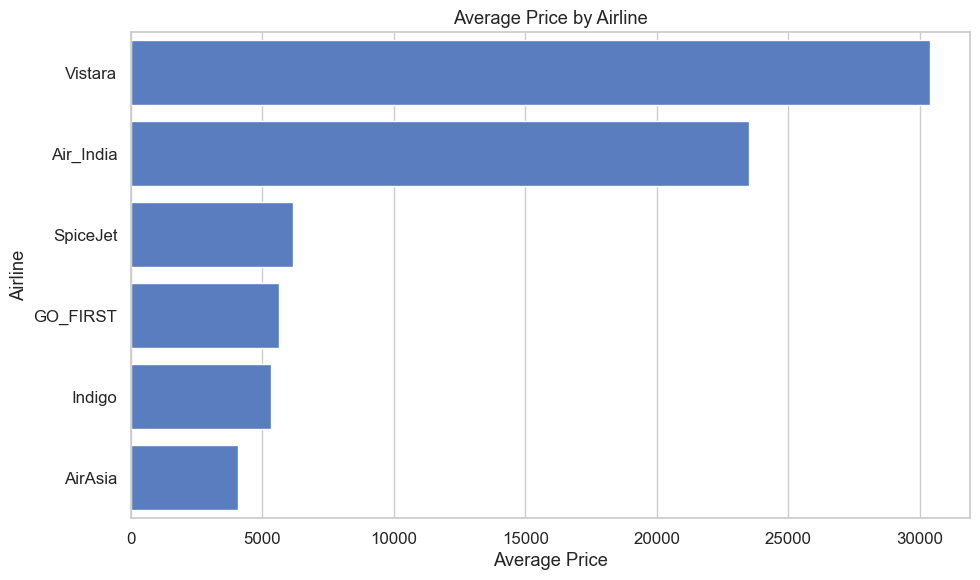

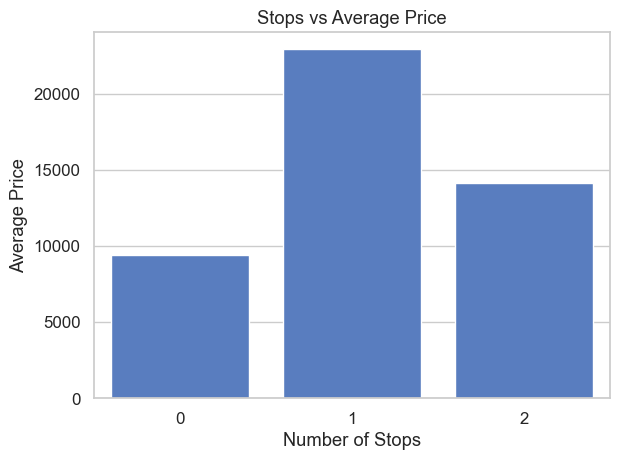

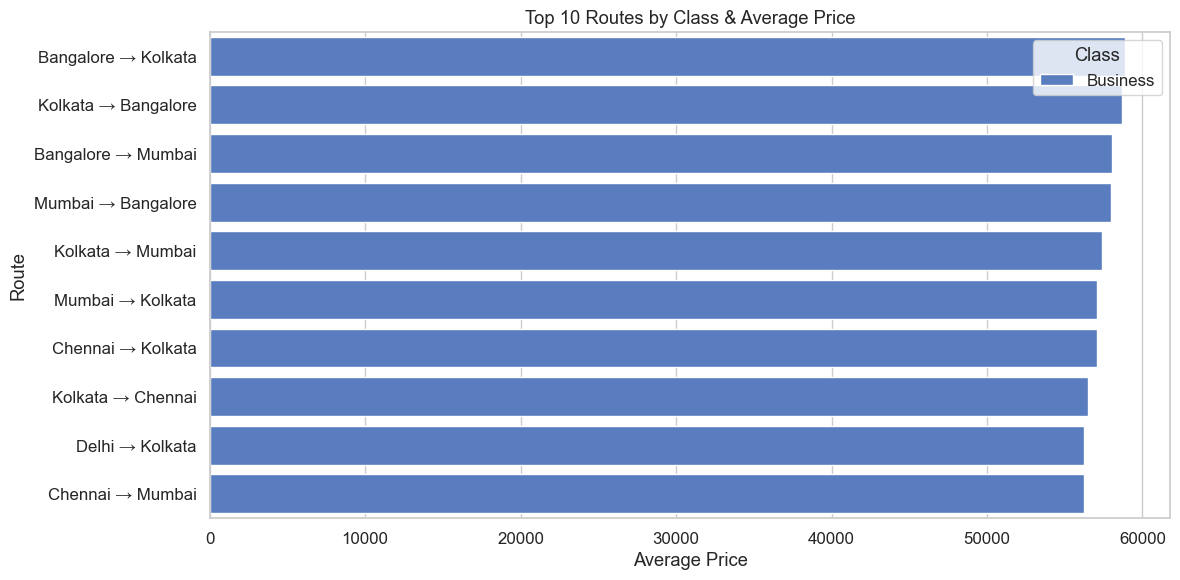

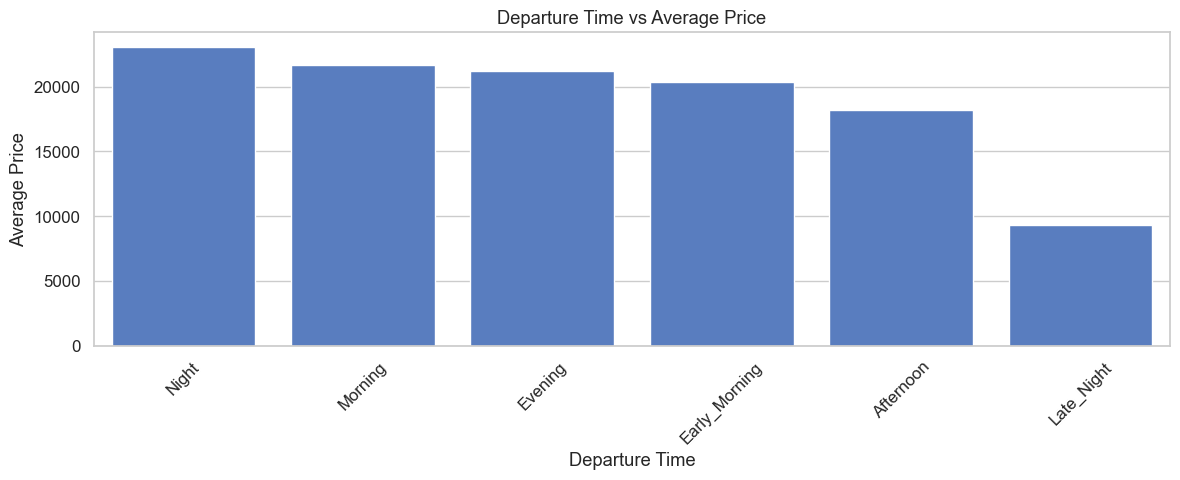

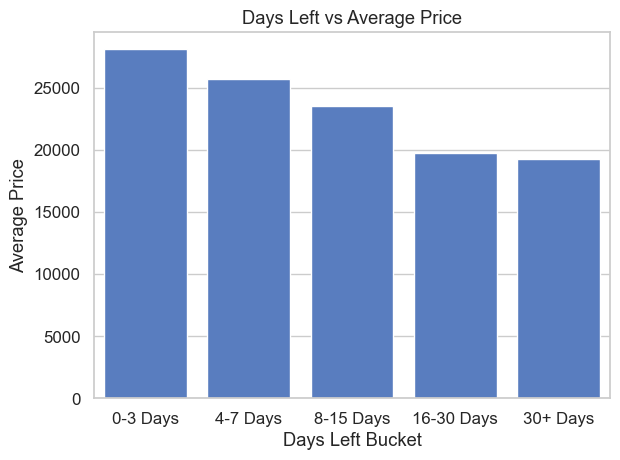

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a consistent style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.figure(figsize=(10, 6))

# 1. Average price by airline
sns.barplot(data=sql_outputs['avg_price_by_airline'], x='avg_price', y='airline')
plt.title("Average Price by Airline")
plt.xlabel("Average Price")
plt.ylabel("Airline")
plt.tight_layout()
plt.show()

# 2. Stops vs Average Price
sns.barplot(data=sql_outputs['stops_vs_avg_price'], x='stops', y='avg_price')
plt.title("Stops vs Average Price")
plt.xlabel("Number of Stops")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()

# 3. Class & Route (top 10)
top_routes = sql_outputs['avg_price_by_class_and_route']
plt.figure(figsize=(12, 6))
sns.barplot(data=top_routes, x='avg_price', y='route', hue='class')
plt.title("Top 10 Routes by Class & Average Price")
plt.xlabel("Average Price")
plt.ylabel("Route")
plt.legend(title="Class")
plt.tight_layout()
plt.show()

# 4. Departure Time vs Price
dep_time = sql_outputs['departure_time_vs_avg_price']
plt.figure(figsize=(12, 5))
sns.barplot(data=dep_time, x='departure_time', y='avg_price', order=dep_time.sort_values('avg_price', ascending=False)['departure_time'])
plt.title("Departure Time vs Average Price")
plt.xlabel("Departure Time")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Days Left vs Price
days_left = sql_outputs['days_left_vs_avg_price']
sns.barplot(data=days_left, x='days_left_bucket', y='avg_price')
plt.title("Days Left vs Average Price")
plt.xlabel("Days Left Bucket")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()


In [16]:
import plotly.express as px

# 1. Average Price by Airline
fig1 = px.bar(
    sql_outputs['avg_price_by_airline'],
    x='avg_price',
    y='airline',
    orientation='h',
    title='Average Price by Airline',
    labels={'avg_price': 'Average Price', 'airline': 'Airline'}
)
fig1.update_layout(yaxis={'categoryorder':'total ascending'})
fig1.show()

# 2. Stops vs Average Price
fig2 = px.bar(
    sql_outputs['stops_vs_avg_price'],
    x='stops',
    y='avg_price',
    title='Number of Stops vs Average Price',
    labels={'stops': 'Number of Stops', 'avg_price': 'Average Price'}
)
fig2.show()

# 3. Top 10 Routes by Class & Average Price
fig3 = px.bar(
    sql_outputs['avg_price_by_class_and_route'],
    x='avg_price',
    y='route',
    color='class',
    title='Top 10 Routes by Class & Average Price',
    labels={'avg_price': 'Average Price', 'route': 'Route', 'class': 'Class'},
    orientation='h'
)
fig3.show()

# 4. Departure Time vs Average Price
fig4 = px.bar(
    sql_outputs['departure_time_vs_avg_price'],
    x='departure_time',
    y='avg_price',
    title='Departure Time vs Average Price',
    labels={'departure_time': 'Departure Time', 'avg_price': 'Average Price'}
)
fig4.show()

# 5. Days Left vs Average Price
fig5 = px.bar(
    sql_outputs['days_left_vs_avg_price'],
    x='days_left_bucket',
    y='avg_price',
    title='Days Left vs Average Price',
    labels={'days_left_bucket': 'Days Left Bucket', 'avg_price': 'Average Price'}
)
fig5.show()
